# Detecting Fake News Python Project

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#importing data sets
news_df = pd.read_csv('Downloads/news.csv')

In [3]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
#adding new column containing length of text
news_df['length'] = news_df['text'].apply(len)
news_df.head()

,Unnamed: 0,title,text,label,length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


array([<AxesSubplot:title={'center':'FAKE'}>,
       <AxesSubplot:title={'center':'REAL'}>], dtype=object)

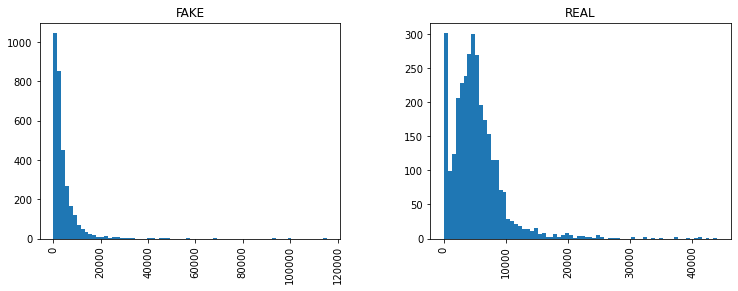

In [12]:
news_df.hist(column='length',by='label',bins=70, figsize=(12,4))

C:\Users\Karan Katariya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

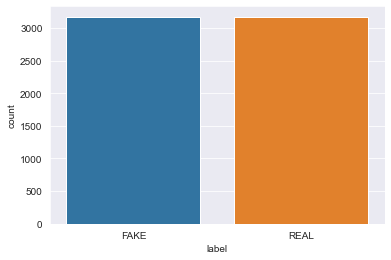

In [25]:
sns.set_style('darkgrid')
sns.countplot(news_df.label)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [41]:
X_train,X_test,y_train,y_test = train_test_split(news_df['text'],news_df['label'],test_size=0.4,random_state=101)
tfidf = TfidfVectorizer(stop_words='english',max_df=0.7)

In [42]:
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [45]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

predictions=pac.predict(tfidf_test)
print(predictions)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93      1274
        REAL       0.94      0.92      0.93      1260

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [48]:
print(confusion_matrix(y_test,predictions))

[[1197   77]
 [ 104 1156]]


In [51]:
score=accuracy_score(y_test,predictions)
print(f'Accuracy : {round(score*100,2)}%')

Accuracy : 92.86%
